In [103]:
import pandas as pd
import numpy as np

In [104]:
iris = pd.read_csv('datasets/Iris.csv')

In [105]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [106]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [107]:
iris_features = iris.iloc[:, 1:5]

In [108]:
iris_features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [109]:
points = iris_features.values

In [110]:
points.shape

(150, 4)

In [111]:
new_points = points.copy()

In [112]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


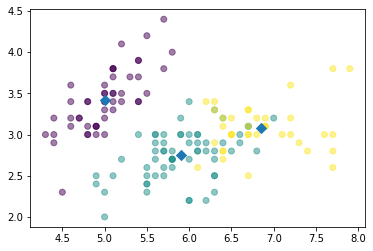

In [113]:
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

In [115]:
seeds = pd.read_csv('datasets/seeds.csv')

In [116]:
seeds.head()

,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


In [117]:
samples = seeds.iloc[:,:7].values
varieties = seeds.iloc[:,7].values

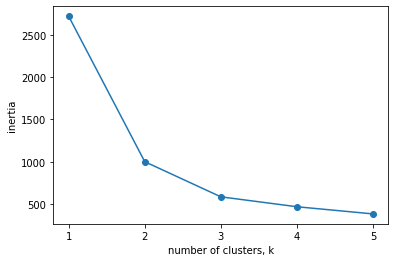

In [118]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [119]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)


varieties   1   2   3
labels               
0           9   0  68
1          59  10   2
2           1  60   0


In [120]:
fish = pd.read_csv('datasets/fish.csv')
fish.head()

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2


In [121]:
species = fish['Bream']
samples = fish.iloc[:, 1:].values

In [122]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

In [123]:
# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            0    17      0      0
1            0     0     19      1
2           33     0      1      0
3            0     0      0     13


In [124]:
prices = pd.read_csv('datasets/seeds.csv')
prices.head()

,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


In [125]:
samples = prices.iloc[:, :7].values
varieties = prices.iloc[:, 7].values

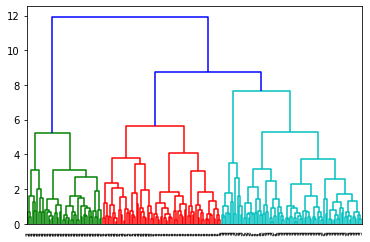

In [126]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

In [127]:
price_movements = pd.read_csv('datasets/price_movements.csv')
price_movements.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,2010-01-19,2010-01-20,2010-01-21,2010-01-22,2010-01-25,2010-01-26,2010-01-27,2010-01-28,2010-01-29,2010-02-01,2010-02-02,2010-02-03,2010-02-04,2010-02-05,2010-02-08,2010-02-09,2010-02-10,2010-02-11,2010-02-12,2010-02-16,2010-02-17,2010-02-18,2010-02-19,2010-02-22,2010-02-23,2010-02-24,2010-02-25,2010-02-26,2010-03-01,...,2013-09-04,2013-09-05,2013-09-06,2013-09-09,2013-09-10,2013-09-11,2013-09-12,2013-09-13,2013-09-16,2013-09-17,2013-09-18,2013-09-19,2013-09-20,2013-09-23,2013-09-24,2013-09-25,2013-09-26,2013-09-27,2013-09-30,2013-10-01,2013-10-02,2013-10-03,2013-10-04,2013-10-07,2013-10-08,2013-10-09,2013-10-10,2013-10-11,2013-10-14,2013-10-15,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,6.709993,-3.180006,-4.009998,-9.030006,0.560000,-0.010000,1.030010,-5.640009,-9.019993,2.360001,-0.050001,4.060000,-4.680000,2.829998,-1.570009,-0.229992,-0.769990,3.789993,2.269998,1.459994,-1.639998,1.300003,-0.190005,-1.920004,-2.940000,2.430002,4.619999,2.239998,3.240008,...,-0.869980,-4.980034,-0.219979,1.169960,-11.559998,0.699989,4.190003,-4.439995,-10.879982,7.360008,1.500008,1.599983,-10.589988,-5.459991,-5.779999,-7.669976,0.219979,-1.029983,-0.500038,9.510018,3.929970,-7.100029,-0.829979,1.190040,-9.000045,1.950005,-1.679985,5.820000,6.209969,1.169960,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,0.200001,-0.100000,-0.460001,-1.190001,-0.650000,-1.300001,0.430000,-1.690000,-0.300001,-0.420000,-0.020001,-0.099998,-0.940001,-0.090000,-0.250000,0.760000,3.710001,-0.200001,1.000000,0.000000,-0.630001,0.299999,-0.010000,1.540001,-1.459999,0.830000,0.069999,-0.900000,-2.179998,...,0.680000,0.229999,-0.720002,0.829998,-0.130001,0.340000,-0.620003,0.320000,-0.470001,0.790001,0.279999,-0.930000,-0.020000,-0.439998,0.100003,0.190003,-0.239998,-0.029998,0.020000,0.579998,0.350002,-0.210003,0.660000,-0.310001,-1.099998,0.050000,1.290001,0.330002,0.599999,-0.160000,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,1.300003,-1.349998,-0.639999,-4.169998,-1.790000,-1.079995,1.720001,1.599999,-4.360000,-4.309997,-0.669998,1.979995,-2.699997,1.510002,-2.549995,-0.169998,-0.639999,2.879997,0.670006,-2.529999,-0.760002,2.240006,-0.390007,0.639999,-0.770004,1.760002,0.029999,0.520005,5.840004,...,5.310028,0.470001,0.529998,2.489990,-0.190003,0.730011,-0.530030,-2.220002,-3.760009,6.540008,7.970001,-1.709991,3.799987,-2.520020,1.700012,-1.880005,4.220001,-0.910003,-0.769989,6.730011,2.470001,-5.630005,3.910004,-5.209991,-8.269989,-5.190002,0.540008,6.120026,1.480011,-3.470001,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,0.719997,0.050000,-0.830002,-2.770001,-1.309997,0.559997,0.709999,-1.239998,0.060002,0.369999,0.340000,-0.579998,-0.500000,0.189998,-0.969997,0.270001,0.169998,0.480000,0.629997,0.809998,-0.480000,0.080002,0.170002,-0.169998,-0.810002,0.310002,0.370003,0.039997,-0.070000,...,0.620002,0.639999,-0.570000,0.070008,0.379997,0.480003,0.000000,-0.279999,-0.739998,1.320000,0.650001,-0.239998,-0.300003,-0.849999,-0.319999,-0.139999,0.320000,-0.169999,0.549996,0.290001,-0.549995,-0.090004,0.430001,-0.559998,-0.809998,-0.159996,1.470002,0.730004,0.739998,-0.379997,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,

In [128]:
movements = price_movements.iloc[:, 1:].values
companies = price_movements.iloc[:, 1].values

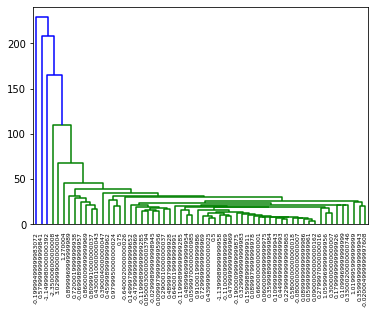

In [129]:
# Calculate the linkage: mergings
mergings = linkage(movements, method='complete')

# Plot the dendrogram
dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=6)
plt.show()


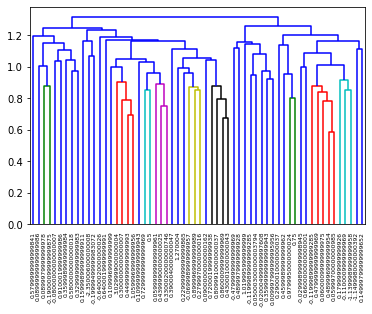

In [130]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=6)
plt.show()


In [131]:
eurovision = pd.read_csv('datasets/eurovision.csv')
eurovision.head()

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0


In [132]:
samples = eurovision.iloc[:, 2:9].values
country_names = eurovision.iloc[:, 1].values

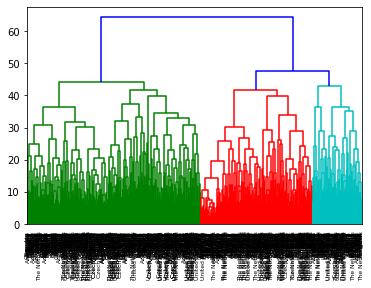

In [133]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram
dendrogram(mergings, labels=country_names, leaf_rotation=90, leaf_font_size=6)
plt.show()


In [134]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'country_names': country_names})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['country_names'])

# Display ct
print(ct)


country_names  Armenia  Australia  ...  Ukraine  United Kingdom
labels                             ...                         
1                    1          0  ...        0               0
2                    0          0  ...        0               0
3                    1          0  ...        0               0
4                    0          0  ...        0               0
5                    0          0  ...        0               0
...                ...        ...  ...      ...             ...
710                  0          0  ...        0               0
711                  0          0  ...        0               0
712                  0          0  ...        0               0
713                  0          1  ...        0               0
714                  0          0  ...        0               0

[714 rows x 26 columns]


In [135]:
seeds = pd.read_csv('datasets/seeds.csv')

In [136]:
samples = seeds.iloc[:,:7].values
variety_numbers = seeds.iloc[:,7].values

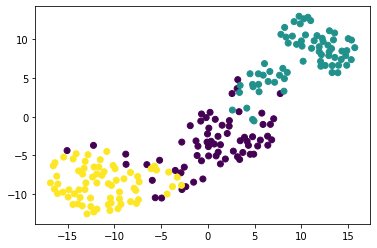

In [137]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()


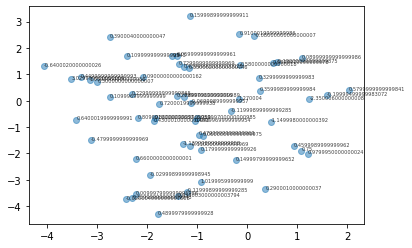

In [138]:
# Import TSNE
from sklearn.manifold import TSNE
# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()


In [139]:
grain_csv = pd.read_csv('datasets/seeds-width-vs-length.csv')
grains = grain_csv.values

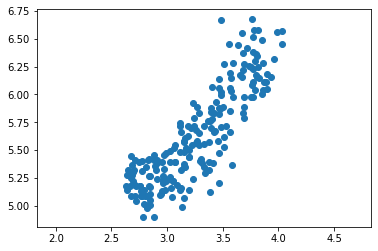

0.8604405325922296


In [140]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

# PCA to decorrelate these correlated features

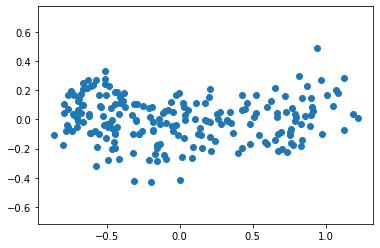

-2.4130118847726503e-16


In [141]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

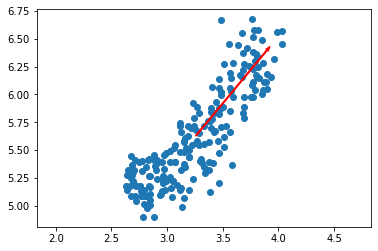

In [142]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

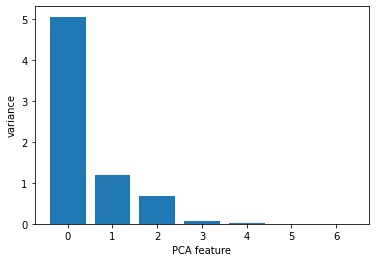

In [143]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


# so it has 2 intrinsic dimension => only two dimensions of interest & importance => two signficant features => two informative features and rest are noisy features

# PCA has problem with sparse data (most of data is zeros) also called csr_matrix
# So TruncatedSVD will work on this similar to PCA
# TruncatedSVD is able to perform PCA on sparse arrays in csr_matrix format, such as word-frequency arrays.

In [144]:
wikipedia_words = pd.read_csv('datasets/wikipedia-vectors.csv')
wikipedia_words.head()

,Unnamed: 0,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,LinkedIn,Global warming,Nationally Appropriate Mitigation Action,Nigel Lawson,Connie Hedegaard,Climate change,Kyoto Protocol,350.org,Greenhouse gas emissions by the United States,2010 United Nations Climate Change Conference,2007 United Nations Climate Change Conference,Angelina Jolie,Michael Fassbender,Denzel Washington,Catherine Zeta-Jones,Jessica Biel,Russell Crowe,Mila Kunis,Dakota Fanning,Anne Hathaway,Jennifer Aniston,France national football team,Cristiano Ronaldo,Arsenal F.C.,Radamel Falcao,Zlatan Ibrahimović,Colombia national football team,2014 FIFA World Cup qualification,Football,Neymar,Franck Ribéry,Tonsillitis,Hepatitis B,Doxycycline,Leukemia,Gout,Hepatitis C,Prednisone,Fever,Gabapentin,Lymphoma,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.020076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.008878,0.0,0.0,0.049502,0.000000,0.00000,0.0
1,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00611,0.0
2,2,0.0,0.029607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017294,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007054,0.006915,0.0,0.014745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020774,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0
3,3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.005646,0.00000,0.0
4,4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0


In [145]:
articles = wikipedia_words.iloc[:, 1:].values
titles = wikipedia_words.iloc[:, 1].values

In [146]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)


In [147]:
# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values(by='label'))


       label   article
2594       0  0.049790
10544      0  0.055154
12542      0  0.108913
5756       0  0.237097
456        0  0.000000
...      ...       ...
9044       5  0.000000
6768       5  0.000000
1503       5  0.000000
760        5  0.000000
6485       5  0.000000

[13125 rows x 2 columns]


In [148]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=3)

# Fit the PCA instance to the scaled samples
pca.fit(samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(samples)

# Print the shape of pca_features
print(pca_features.shape)


(209, 3)


# NMF => Non negative matrix factorization => similar to PCA But this works differently by factorizing => document is group of samples and so on => factorizing array into ones that can be reconstructed again

In [149]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features.round(2))


[[0.01 0.   0.   0.01 0.   0.  ]
 [0.   0.   0.   0.   0.   0.  ]
 [0.   0.01 0.   0.   0.01 0.01]
 ...
 [0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.01 0.   0.  ]
 [0.   0.   0.   0.   0.   0.  ]]


# NMF Can detect patterns so how to learn parts in images for example

In [150]:
lcd_images = pd.read_csv('datasets/lcd.csv')
lcd_images.head()

,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,0.0.9,1.0,1.0.1,1.0.2,1.0.3,0.0.10,0.0.11,0.0.12,0.0.13,0.0.14,0.0.15,0.0.16,0.0.17,1.0.4,0.0.18,0.0.19,0.0.20,0.0.21,0.0.22,0.0.23,0.0.24,1.0.5,0.0.25,0.0.26,0.0.27,0.0.28,0.0.29,0.0.30,0.0.31,1.0.6,0.0.32,...,0.0.55,0.0.56,0.0.57,0.0.58,0.0.59,0.0.60,1.0.9,0.0.61,0.0.62,0.0.63,0.0.64,0.0.65,0.0.66,0.0.67,1.0.10,0.0.68,0.0.69,0.0.70,0.0.71,0.0.72,0.0.73,0.0.74,1.0.11,0.0.75,0.0.76,0.0.77,0.0.78,0.0.79,0.0.80,0.0.81,0.0.82,0.0.83,0.0.84,0.0.85,0.0.86,0.0.87,0.0.88,0.0.89,0.0.90,0.0.91
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
samples = lcd_images.values

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


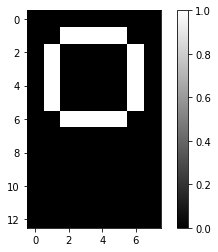

In [152]:
# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape((13, 8))

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()


In [153]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

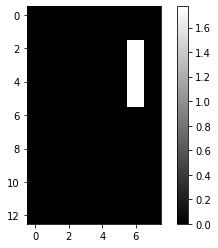

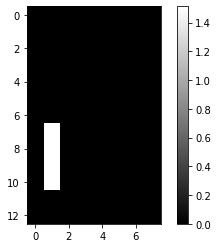

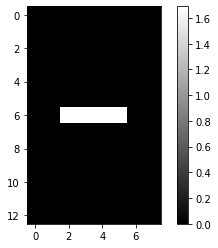

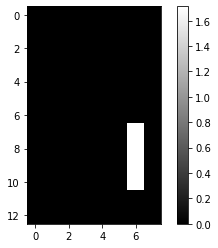

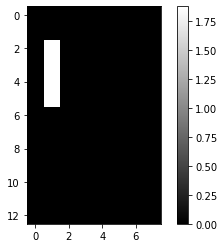

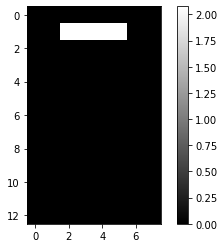

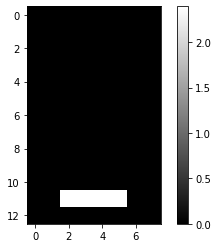

[0.56389272 0.         0.59151401 0.         0.53290007 0.48133215
 0.        ]


In [154]:
# Import NMF
from sklearn.decomposition import NMF 

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

# NMF has expressed the digit as a sum of the components!

# But PCA doesn't learn parts and patterns

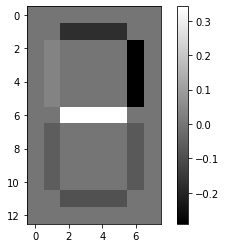

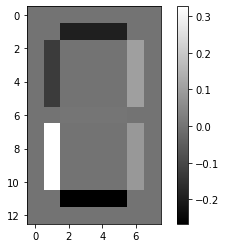

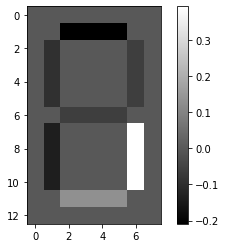

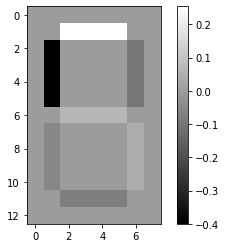

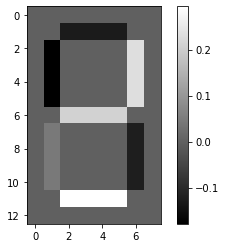

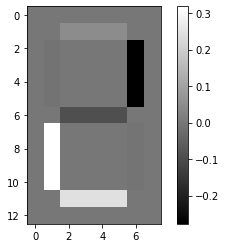

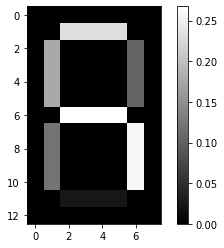

In [155]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# We can use it also to make recommender system